In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# import ipl dataset
ipl=pd.read_csv("match_info_data.csv")

In [79]:
# The First Five Records of the  Dataset
ipl.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


In [190]:
# the last five records of the dataset
ipl.tail(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1019,335986,2007/08,Kolkata,2008/04/20,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,Asad Rauf
1020,335985,2007/08,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,AV Jayaprakash
1021,335984,2007/08,Delhi,2008/04/19,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,IL Howell
1022,335983,2007/08,Chandigarh,2008/04/19,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,RB Tiffin
1023,335982,2007/08,Bangalore,2008/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,AM Saheba


In [4]:
# Looking at the Numbers of Rows and Columns in the Dataset
ipl.shape

(1024, 18)

In [5]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1024 non-null   int64 
 1   season           1024 non-null   object
 2   city             973 non-null    object
 3   date             1024 non-null   object
 4   team1            1024 non-null   object
 5   team2            1024 non-null   object
 6   toss_winner      1024 non-null   object
 7   toss_decision    1024 non-null   object
 8   result           1024 non-null   object
 9   dl_applied       1024 non-null   int64 
 10  winner           1005 non-null   object
 11  win_by_runs      1024 non-null   int64 
 12  win_by_wickets   1024 non-null   int64 
 13  player_of_match  1019 non-null   object
 14  venue            1024 non-null   object
 15  umpire1          1024 non-null   object
 16  umpire2          1024 non-null   object
 17  umpire3          1021 non-null   

In [42]:
ipl.isnull().sum()

id                  0
season              0
city               51
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner             19
win_by_runs         0
win_by_wickets      0
player_of_match     5
venue               0
umpire1             0
umpire2             0
umpire3             3
dtype: int64

In [41]:
# Checking for Null Values in the 'city' Column
ipl[ipl['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
208,1237181,2020/21,NaN,2020/11/10,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Mumbai Indians,0,5,TA Boult,Dubai International Cricket Stadium,CB Gaffaney,Nitin Menon,AK Chaudhary
211,1237177,2020/21,NaN,2020/11/05,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,57,0,JJ Bumrah,Dubai International Cricket Stadium,CB Gaffaney,Nitin Menon,KN Ananthapadmanabhan
212,1216495,2020/21,NaN,2020/11/03,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,S Nadeem,Sharjah Cricket Stadium,C Shamshuddin,RK Illingworth,KN Ananthapadmanabhan
215,1216530,2020/21,NaN,2020/11/01,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,60,0,PJ Cummins,Dubai International Cricket Stadium,Nitin Menon,PR Reiffel,AK Chaudhary
216,1216502,2020/21,NaN,2020/10/31,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,5,Sandeep Sharma,Sharjah Cricket Stadium,KN Ananthapadmanabhan,K Srinivasan,C Shamshuddin
217,1216535,2020/21,NaN,2020/10/31,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,Ishan Kishan,Dubai International Cricket Stadium,YC Barde,PR Reiffel,AK Chaudhary
219,1216536,2020/21,NaN,2020/10/29,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,RD Gaikwad,Dubai International Cricket Stadium,C Shamshuddin,RK Illingworth,KN Ananthapadmanabhan
221,1216524,2020/21,NaN,2020/10/27,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Sunrisers Hyderabad,88,0,WP Saha,Dubai International Cricket Stadium,AK Chaudhary,Nitin Menon,PR Reiffel
222,1216520,2020/21,NaN,2020/10/26,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,8,CH Gayle,Sharjah Cricket Stadium,KN Ananthapadmanabhan,RK Illingworth,K Srinivasan
223,1216544,2020/21,NaN,2020/10/25,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,normal,0,Chennai Super Kings,0,8,RD Gaikwad,Dubai International Cricket Stadium,C Shamshuddin,RK Illingworth,KN Ananthapadmanabhan


In [44]:
#Checking for Null Values in the 'winner' Column
ipl[ipl["winner"].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
29,1359519,2023,Lucknow,2023/05/03,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,normal,0,NaN,0,0,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,AK Chaudhary,NA Patwardhan,CB Gaffaney
189,1254077,2021,Chennai,2021/04/25,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,NaN,0,0,PP Shaw,"MA Chidambaram Stadium, Chepauk, Chennai",CB Gaffaney,KN Ananthapadmanabhan,Tapan Sharma
232,1216517,2020/21,NaN,2020/10/18,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,NaN,0,0,KL Rahul,Dubai International Cricket Stadium,Nitin Menon,PR Reiffel,AK Chaudhary
233,1216512,2020/21,Abu Dhabi,2020/10/18,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,NaN,0,0,LH Ferguson,Sheikh Zayed Stadium,PG Pathak,S Ravi,VK Sharma
258,1216547,2020/21,NaN,2020/09/28,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,NaN,0,0,AB de Villiers,Dubai International Cricket Stadium,Nitin Menon,PR Reiffel,AK Chaudhary
266,1216493,2020/21,NaN,2020/09/20,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,NaN,0,0,MP Stoinis,Dubai International Cricket Stadium,AK Chaudhary,Nitin Menon,PR Reiffel
277,1178426,2019,Mumbai,2019/05/02,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,NaN,0,0,JJ Bumrah,Wankhede Stadium,CK Nandan,S Ravi,A Nand Kishore
279,1178424,2019,Bengaluru,2019/04/30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,NaN,0,0,NaN,M.Chinnaswamy Stadium,NJ Llong,UV Gandhe,AK Chaudhary
318,1175365,2019,Delhi,2019/03/30,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,normal,0,NaN,0,0,PP Shaw,Arun Jaitley Stadium,AY Dandekar,Nitin Menon,M Erasmus
413,1082625,2017,Rajkot,2017/04/29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,normal,0,NaN,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,A Nand Kishore


In [46]:
#Checking for Null Values in the 'player_of_match' Column
ipl[ipl["player_of_match"].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
29,1359519,2023,Lucknow,2023/05/03,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,normal,0,NaN,0,0,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,AK Chaudhary,NA Patwardhan,CB Gaffaney
279,1178424,2019,Bengaluru,2019/04/30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,NaN,0,0,NaN,M.Chinnaswamy Stadium,NJ Llong,UV Gandhe,AK Chaudhary
512,829813,2015,Bangalore,2015/05/17,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,normal,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,PG Pathak
538,829763,2015,Bangalore,2015/04/29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,C Shamshuddin
782,501265,2011,Delhi,2011/05/21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,normal,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,RB Tiffin


In [47]:
#Filling Null Values in the 'city' Column
ipl["city"].fillna("Unknown", inplace=True)

In [49]:
#Filling Null Values in the 'winner' Column
ipl["winner"].fillna("Unknown", inplace=True)

In [50]:
#Filling Null Values in the 'player_of_match' Column
ipl["player_of_match"].fillna("Unknown", inplace=True)

In [52]:
#Filling Null Values in the 'umpire3' Column
ipl["umpire3"].fillna("Unknown", inplace=True)

In [53]:
# rechecking the null values
ipl.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [ ]:
#Rechecking the total filling null values

In [64]:
ipl[ipl["winner"]=="Unknown"].shape[0]

19

In [69]:
ipl[ipl["city"]=="Unknown"].shape[0]

51

In [70]:
ipl[ipl["umpire3"]=="Unknown"].shape[0]

3

In [71]:
ipl[ipl["player_of_match"]=="Unknown"].shape[0]

5

In [29]:
#Calculating the Number of Unique Values in Each Column
ipl.nunique()

id                 1024
season               16
city                 35
date                761
team1                18
team2                18
toss_winner          18
toss_decision         2
result                2
dl_applied            2
winner               18
win_by_runs          98
win_by_wickets       11
player_of_match     280
venue                56
umpire1              60
umpire2              62
umpire3              69
dtype: int64

In [77]:
#Counting the Number of Duplicate Rows
ipl.duplicated().sum()

0

In [80]:
# Getting the Frequency of Most Player of the Match Award
ipl["player_of_match"].value_counts()

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
MS Dhoni          17
                  ..
Imran Tahir        1
KK Ahmed           1
PK Garg            1
CJ Jordan          1
MF Maharoof        1
Name: count, Length: 280, dtype: int64

In [81]:
# Getting the Top 10 Player with Most Player of the Match Awards
ipl["player_of_match"].value_counts()[0:10]

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
MS Dhoni          17
V Kohli           16
SR Watson         16
YK Pathan         16
KA Pollard        14
SK Raina          14
Name: count, dtype: int64

In [82]:
#Getting the Top 5 Players with most Player of the match Awards
ipl["player_of_match"].value_counts()[0:5]

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
MS Dhoni          17
Name: count, dtype: int64

In [83]:
list(ipl["player_of_match"].value_counts()[0:5].keys())

['AB de Villiers', 'CH Gayle', 'RG Sharma', 'DA Warner', 'MS Dhoni']

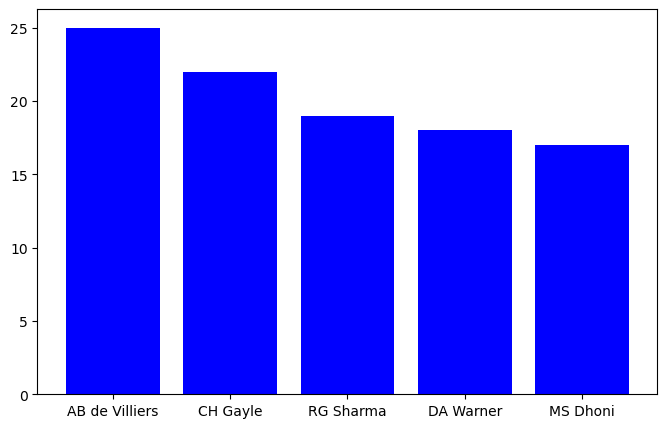

In [90]:
plt.figure(figsize=(8,5))
plt.bar(list(ipl["player_of_match"].value_counts()[0:5].keys()),list(ipl["player_of_match"].value_counts()[0:5]),color="Blue")
plt.show()

In [88]:
#Getting the Frequency result of column
ipl["result"].value_counts()

result
normal    1003
D/L         21
Name: count, dtype: int64

In [89]:
# Finding out the number of toss winner each team
ipl["toss_winner"].value_counts()

toss_winner
Mumbai Indians                 133
Chennai Super Kings            119
Kolkata Knight Riders          119
Royal Challengers Bangalore    113
Rajasthan Royals               109
Kings XI Punjab                 85
Sunrisers Hyderabad             81
Delhi Daredevils                80
Delhi Capitals                  43
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Titans                  19
Gujarat Lions                   15
Punjab Kings                    14
Lucknow Super Giants            10
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [147]:
# getting batting First won teams counts
batting_first["winner"].value_counts()

winner
Mumbai Indians                 69
Chennai Super Kings            67
Royal Challengers Bangalore    53
Kolkata Knight Riders          48
Rajasthan Royals               41
Kings XI Punjab                40
Sunrisers Hyderabad            38
Delhi Daredevils               25
Deccan Chargers                18
Delhi Capitals                 16
Lucknow Super Giants           12
Punjab Kings                   11
Gujarat Titans                  9
Pune Warriors                   6
Rising Pune Supergiant          5
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: count, dtype: int64

In [101]:
# Extracting the record where a team won batting first
batting_first=ipl[ipl["win_by_runs"]!=0]
batting_first.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
6,1359542,2023,Kolkata,2023/05/20,Lucknow Super Giants,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Lucknow Super Giants,1,0,N Pooran,"Eden Gardens, Kolkata",J Madanagopal,UV Gandhe,YC Barde
7,1359541,2023,Delhi,2023/05/20,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,77,0,RD Gaikwad,"Arun Jaitley Stadium, Delhi",CB Gaffaney,NA Patwardhan,AK Chaudhary


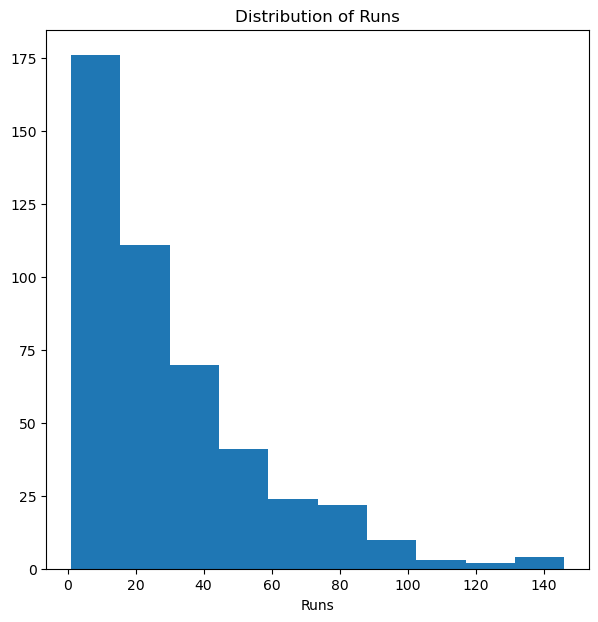

In [112]:
# Making a Histogram
plt.figure(figsize=(7,7))
plt.hist(batting_first["win_by_runs"])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.show()

In [148]:
# # getting batting Second won teams counts
batting_second["winner"].value_counts()

winner
Kolkata Knight Riders          71
Mumbai Indians                 69
Chennai Super Kings            64
Royal Challengers Bangalore    61
Rajasthan Royals               60
Kings XI Punjab                45
Delhi Daredevils               42
Sunrisers Hyderabad            40
Delhi Capitals                 22
Gujarat Titans                 14
Gujarat Lions                  12
Deccan Chargers                11
Punjab Kings                    8
Pune Warriors                   6
Rising Pune Supergiant          5
Lucknow Super Giants            5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: count, dtype: int64

In [102]:
# Extracting the record where a team won batting second
batting_second=ipl[ipl["win_by_wickets"]!=0]
batting_second.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit
5,1359544,2023,Bengaluru,2023/05/21,Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,normal,0,Gujarat Titans,0,6,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru",Nitin Menon,VK Sharma,Tapan Sharma
8,1359540,2023,Dharamsala,2023/05/19,Punjab Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,D Padikkal,"Himachal Pradesh Cricket Association Stadium, ...",A Nand Kishore,RJ Tucker,Navdeep Singh
9,1359539,2023,Hyderabad,2023/05/18,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,V Kohli,"Rajiv Gandhi International Stadium, Uppal, Hyd...",BNJ Oxenford,VK Sharma,HAS Khalid


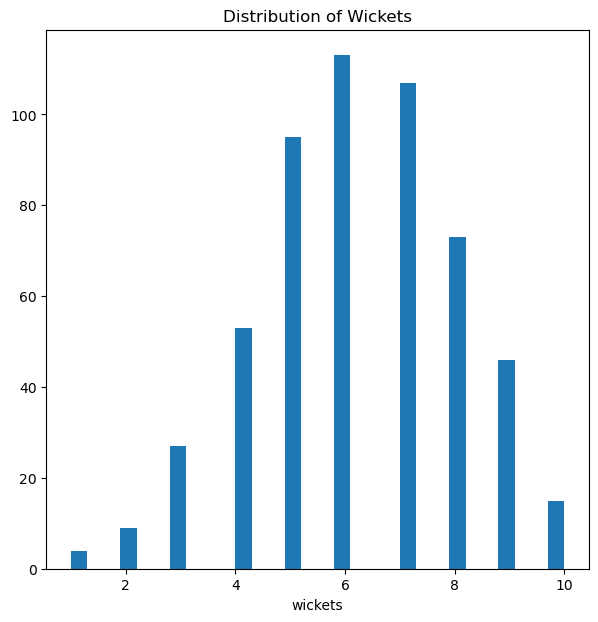

In [143]:
# Making a Histogram for frequency of wins numbers of Wickets
plt.figure(figsize=(7,7))
plt.hist(batting_second["win_by_wickets"],bins=30)
plt.title("Distribution of Wickets")
plt.xlabel("wickets")
plt.show()

In [110]:
# Finding out the Number of the wins each team after winning first
ipl["winner"].value_counts()

winner
Mumbai Indians                 138
Chennai Super Kings            131
Kolkata Knight Riders          119
Royal Challengers Bangalore    114
Rajasthan Royals               101
Kings XI Punjab                 85
Sunrisers Hyderabad             78
Delhi Daredevils                67
Delhi Capitals                  38
Deccan Chargers                 29
Gujarat Titans                  23
Punjab Kings                    19
Lucknow Super Giants            17
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

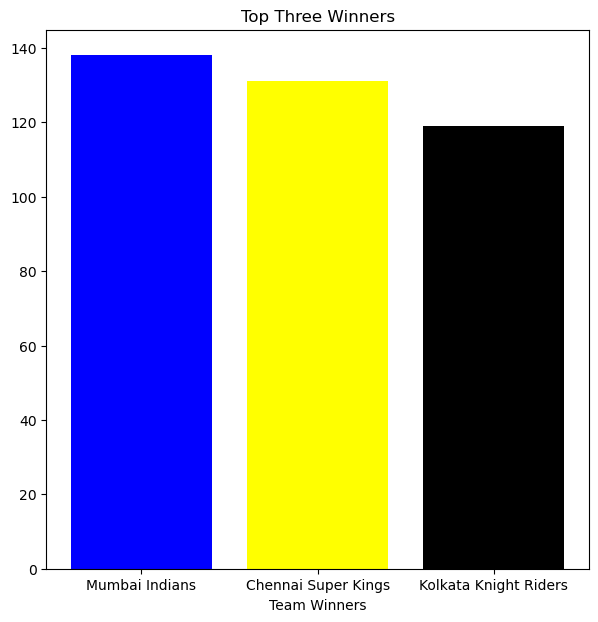

In [123]:
# Making a Bar plot
plt.figure(figsize=(7,7))
plt.bar(list(ipl["winner"].value_counts()[0:3].keys()),list(ipl["winner"].value_counts()[0:3]),color=["Blue","yellow","black"])
plt.title("Top Three Winners")
plt.xlabel("Team Winners")
plt.show()

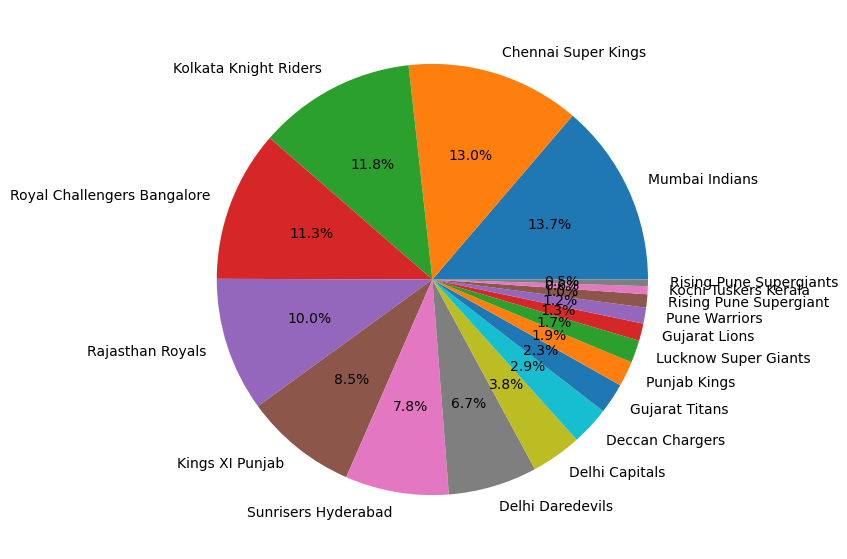

In [211]:
plt.figure(figsize=(7,7))
plt.pie(list(ipl["winner"].value_counts()),labels=list(ipl["winner"].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [96]:
# Finding out Number of matches won batting and Fielding each team
ipl.groupby("toss_decision")["winner"].value_counts()

toss_decision  winner                     
bat            Chennai Super Kings            61
               Mumbai Indians                 52
               Kolkata Knight Riders          46
               Rajasthan Royals               40
               Royal Challengers Bangalore    37
               Delhi Daredevils               29
               Sunrisers Hyderabad            26
               Kings XI Punjab                23
               Deccan Chargers                14
               Delhi Capitals                 10
               Pune Warriors                   9
               Gujarat Titans                  7
               Lucknow Super Giants            4
               Punjab Kings                    3
               Gujarat Lions                   2
               Rising Pune Supergiants         2
field          Mumbai Indians                 86
               Royal Challengers Bangalore    77
               Kolkata Knight Riders          73
               Chennai Sup

In [152]:
# Looking at number of matches played at each seasons
ipl["season"].value_counts()

season
2013       76
2023       74
2022       74
2012       74
2011       73
2021       60
2020/21    60
2019       60
2018       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: count, dtype: int64

In [153]:
## Looking at number of matches played at each city
ipl["city"].value_counts()

city
Mumbai            166
Kolkata            86
Delhi              85
Chennai            76
Hyderabad          71
Bangalore          65
Chandigarh         61
Jaipur             52
Pune               51
Abu Dhabi          37
Ahmedabad          28
Bengaluru          22
Durban             15
Dubai              13
Visakhapatnam      13
Centurion          12
Dharamsala         11
Sharjah            10
Rajkot             10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Cape Town           7
Ranchi              7
Lucknow             7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Guwahati            2
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

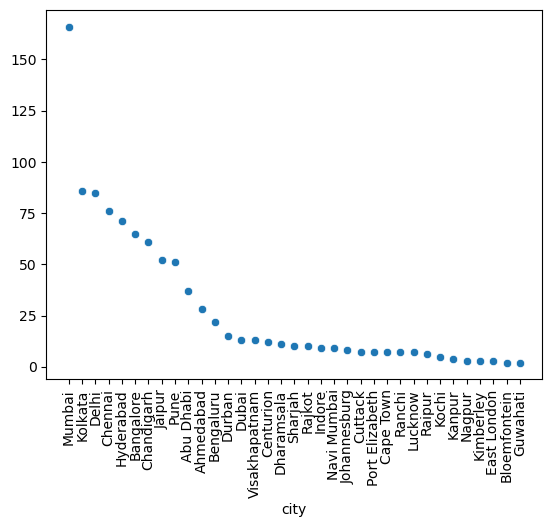

In [206]:
# Making a Scatter plot Frequency of Cities vs Total Number of Matches

sns.scatterplot(x=ipl["city"].value_counts().index, y=ipl["city"].value_counts().values)
plt.xticks(rotation=90)
plt.show

In [155]:
#Counting the Occurrences of Each Team in the 'team1' Column
ipl["team1"].value_counts()

team1
Royal Challengers Bangalore    135
Chennai Super Kings            120
Mumbai Indians                 118
Kolkata Knight Riders          112
Rajasthan Royals                96
Kings XI Punjab                 92
Delhi Daredevils                85
Sunrisers Hyderabad             76
Deccan Chargers                 39
Delhi Capitals                  34
Punjab Kings                    27
Pune Warriors                   23
Gujarat Lions                   16
Gujarat Titans                  15
Lucknow Super Giants            15
Rising Pune Supergiants          7
Rising Pune Supergiant           7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [37]:
#Counting the Occurrences of Each Team in the 'team2' Column
ipl["team2"].value_counts()

team2
Mumbai Indians                 129
Kolkata Knight Riders          125
Rajasthan Royals               110
Royal Challengers Bangalore    105
Chennai Super Kings            104
Kings XI Punjab                 98
Sunrisers Hyderabad             90
Delhi Daredevils                76
Delhi Capitals                  43
Deccan Chargers                 36
Pune Warriors                   23
Gujarat Titans                  18
Punjab Kings                    15
Lucknow Super Giants            15
Gujarat Lions                   14
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [47]:
#Counting the total number of Toss Decisions in field and bat
ipl["toss_decision"].value_counts()

toss_decision
field    652
bat      372
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='toss_decision'>

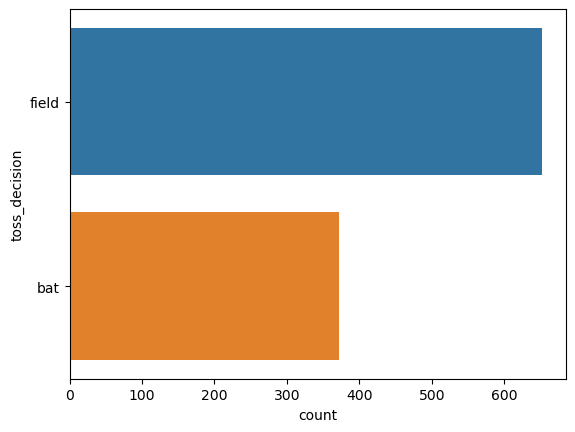

In [194]:
#Analysis of Toss Decisions in IPL Matches
sns.countplot(y="toss_decision",data=ipl)

In [163]:
##Counting the total number of toss winner each teams
ipl["toss_winner"].value_counts()

toss_winner
Mumbai Indians                 133
Chennai Super Kings            119
Kolkata Knight Riders          119
Royal Challengers Bangalore    113
Rajasthan Royals               109
Kings XI Punjab                 85
Sunrisers Hyderabad             81
Delhi Daredevils                80
Delhi Capitals                  43
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Titans                  19
Gujarat Lions                   15
Punjab Kings                    14
Lucknow Super Giants            10
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [171]:
#Counting the total number of players won the "Player of the Match" Awards in venue
ipl.groupby("venue")["player_of_match"].value_counts()

venue                             player_of_match
Arun Jaitley Stadium              A Mishra           2
                                  SS Iyer            2
                                  S Dhawan           2
                                  AS Rajpoot         1
                                  HH Pandya          1
                                                    ..
Zayed Cricket Stadium, Abu Dhabi  KS Williamson      1
                                  RA Jadeja          1
                                  RD Gaikwad         1
                                  SP Narine          1
                                  SS Iyer            1
Name: count, Length: 819, dtype: int64

In [189]:
ipl[["season","venue"]].value_counts()

season   venue                                  
2020/21  Dubai International Cricket Stadium        26
         Sheikh Zayed Stadium                       22
2022     Wankhede Stadium, Mumbai                   21
         Dr DY Patil Sports Academy, Mumbai         20
         Brabourne Stadium, Mumbai                  16
                                                    ..
2009/10  Brabourne Stadium, Mumbai                   1
2013     Maharashtra Cricket Association Stadium     1
2017     M.Chinnaswamy Stadium                       1
2015     JSCA International Stadium Complex          1
2014     Brabourne Stadium                           1
Name: count, Length: 162, dtype: int64

In [188]:
ipl.groupby("venue")["season"].value_counts().head(50)

venue                                                                  season 
Arun Jaitley Stadium                                                   2019        7
                                                                       2018        7
Arun Jaitley Stadium, Delhi                                            2023        7
                                                                       2021        4
Barabati Stadium                                                       2014        3
                                                                       2012        2
                                                                       2009/10     2
Barsapara Cricket Stadium, Guwahati                                    2023        2
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow  2023        7
Brabourne Stadium                                                      2009/10     6
                                                                       

In [212]:
##Counting the total number of "Results" 
ipl["result"].value_counts()

result
normal    1003
D/L         21
Name: count, dtype: int64

In [217]:
# # the total number of D/L method using matches
ipl[ipl["result"] == "D/L"]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
72,1359476,2023,Chandigarh,2023/04/01,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,D/L,1,Punjab Kings,7,0,Arshdeep Singh,"Punjab Cricket Association IS Bindra Stadium, ...",BNJ Oxenford,YC Barde,J Madanagopal
356,1136592,2018,Delhi,2018/05/02,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,D/L,1,Delhi Daredevils,4,0,RR Pant,Arun Jaitley Stadium,CK Nandan,VK Sharma,BNJ Oxenford
369,1136578,2018,Kolkata,2018/04/21,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,D/L,1,Kings XI Punjab,0,9,KL Rahul,Eden Gardens,A Deshmukh,C Shamshuddin,S Ravi
382,1136566,2018,Jaipur,2018/04/11,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,D/L,1,Rajasthan Royals,10,0,SV Samson,Sawai Mansingh Stadium,KN Ananthapadmanabhan,Nitin Menon,RJ Tucker
390,1082648,2017,Bangalore,2017/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,D/L,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,A Nand Kishore
457,980999,2016,Bangalore,2016/05/18,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,D/L,1,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus,K Bharatan
458,980997,2016,Visakhapatnam,2016/05/17,Rising Pune Supergiants,Delhi Daredevils,Rising Pune Supergiants,field,D/L,1,Rising Pune Supergiants,19,0,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,C Shamshuddin,HDPK Dharmasena
463,980989,2016,Kolkata,2016/05/14,Kolkata Knight Riders,Rising Pune Supergiants,Rising Pune Supergiants,bat,D/L,1,Kolkata Knight Riders,0,8,YK Pathan,Eden Gardens,A Nand Kishore,BNJ Oxenford,CB Gaffaney
485,980943,2016,Hyderabad,2016/04/26,Sunrisers Hyderabad,Rising Pune Supergiants,Rising Pune Supergiants,field,D/L,1,Rising Pune Supergiants,34,0,AB Dinda,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,CK Nandan,HDPK Dharmasena


In [224]:
ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,1.024000e+03,1024.000000,1024.000000,1024.000000
mean,8.687579e+05,0.020508,13.610352,3.286133
std,3.528920e+05,0.141799,23.443273,3.375659
min,3.359820e+05,0.000000,0.000000,0.000000
25%,5.483138e+05,0.000000,0.000000,0.000000
50%,8.298140e+05,0.000000,0.000000,3.000000
75%,1.216503e+06,0.000000,19.000000,6.000000
max,1.370353e+06,1.000000,146.000000,10.000000
